In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point

/Users/yanis/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
df1003 = pd.read_csv('velib-disponibilite-en-temps-reel-10:03.csv',sep=";")
df1103 = pd.read_csv('velib-disponibilite-en-temps-reel-11:03.csv',sep=";")
df1203 = pd.read_csv('velib-disponibilite-en-temps-reel-3.csv',sep=";")

In [3]:
data = [df1003,df1103,df1203]
df = pd.concat(data, ignore_index=True, sort=False)
df

Identifiant station                               Nom station  \
0                  40001                            Hôpital Mondor   
1                  16107             Benjamin Godard - Victor Hugo   
2                   9020                        Toudouze - Clauzel   
3                  44015                Rouget de L'isle - Watteau   
4                  11104       Charonne - Robert et Sonia Delaunay   
...                  ...                                       ...   
4408               21302  Aristide Briand - Place de la Résistance   
4409                8002         Gare Saint-Lazare - Cour du Havre   
4410                8004       Malesherbes - Place de la Madeleine   
4411                4010                     Saint-Antoine Sévigné   
4412               42004     Westermeyer - Paul Vaillant-Couturier   

     Station en fonctionnement  Capacité de la station  \
0                          OUI                       0   
1                          OUI                       0   
2                          OUI                       0   
3                          OUI                       0   
4                          OUI                       0   
...                        ...                     ...   
4408                       OUI                       0   
4409                       OUI                       0   
4410                       OUI                       0   
4411                       OUI                       0   
4412                       OUI                       0   

      Nombre bornettes libres  Nombre total vélos disponibles  \
0                          12                              16   
1                          34                               1   
2                          17                               4   
3                           8                              12   
4                          18                               1   
...                       ...                             ...   
4408                        0                              45   
4409                       30                              12   
4410                        6                              73   
4411                        4                              24   
4412                        3                              29   

      Vélos mécaniques disponibles  Vélos électriques disponibles  \
0                               12                              4   
1                                1                              0   
2                                1                              3   
3                                3                              9   
4                                0                              1   
...                            ...                            ...   
4408                            38                              7   
4409                             6                              6   
4410                            32                             41   
4411                            21                              3   
4412                            21                              8   

     Borne de paiement disponible Retour vélib possible  \
0                             OUI                   OUI   
1                             OUI                   OUI   
2                             OUI                   OUI   
3                             OUI                   OUI   
4                             OUI                   OUI   
...                           ...                   ...   
4408                          OUI                   OUI   
4409                          OUI                   OUI   
4410                          OUI                   OUI   
4411                          OUI                   OUI   
4412                          OUI                   OUI   

     Actualisation de la donnée               Coordonnées géographiques  \
0     2025-03-10T14:53:07+00:00        48.798922410229, 2.4537451531298  

In [4]:
df.shape

(4413, 15)

In [5]:
df.dtypes

Identifiant station                object
Nom station                        object
Station en fonctionnement          object
Capacité de la station              int64
Nombre bornettes libres             int64
Nombre total vélos disponibles      int64
Vélos mécaniques disponibles        int64
Vélos électriques disponibles       int64
Borne de paiement disponible       object
Retour vélib possible              object
Actualisation de la donnée         object
Coordonnées géographiques          object
Nom communes équipées              object
Code INSEE communes équipées        int64
station_opening_hours             float64
dtype: object

In [6]:
df = df.drop(columns=['station_opening_hours'])


In [7]:
df = df[df["Station en fonctionnement"] != "NON"]

In [8]:
df["Capacité de la station"] = df["Nombre bornettes libres"] + df["Nombre total vélos disponibles"]
df

Identifiant station                               Nom station  \
0                  40001                            Hôpital Mondor   
1                  16107             Benjamin Godard - Victor Hugo   
2                   9020                        Toudouze - Clauzel   
3                  44015                Rouget de L'isle - Watteau   
4                  11104       Charonne - Robert et Sonia Delaunay   
...                  ...                                       ...   
4408               21302  Aristide Briand - Place de la Résistance   
4409                8002         Gare Saint-Lazare - Cour du Havre   
4410                8004       Malesherbes - Place de la Madeleine   
4411                4010                     Saint-Antoine Sévigné   
4412               42004     Westermeyer - Paul Vaillant-Couturier   

     Station en fonctionnement  Capacité de la station  \
0                          OUI                      28   
1                          OUI                      35   
2                          OUI                      21   
3                          OUI                      20   
4                          OUI                      19   
...                        ...                     ...   
4408                       OUI                      45   
4409                       OUI                      42   
4410                       OUI                      79   
4411                       OUI                      28   
4412                       OUI                      32   

      Nombre bornettes libres  Nombre total vélos disponibles  \
0                          12                              16   
1                          34                               1   
2                          17                               4   
3                           8                              12   
4                          18                               1   
...                       ...                             ...   
4408                        0                              45   
4409                       30                              12   
4410                        6                              73   
4411                        4                              24   
4412                        3                              29   

      Vélos mécaniques disponibles  Vélos électriques disponibles  \
0                               12                              4   
1                                1                              0   
2                                1                              3   
3                                3                              9   
4                                0                              1   
...                            ...                            ...   
4408                            38                              7   
4409                             6                              6   
4410                            32                             41   
4411                            21                              3   
4412                            21                              8   

     Borne de paiement disponible Retour vélib possible  \
0                             OUI                   OUI   
1                             OUI                   OUI   
2                             OUI                   OUI   
3                             OUI                   OUI   
4                             OUI                   OUI   
...                           ...                   ...   
4408                          OUI                   OUI   
4409                          OUI                   OUI   
4410                          OUI                   OUI   
4411                          OUI                   OUI   
4412                          OUI                   OUI   

     Actualisation de la donnée               Coordonnées géographiques  \
0     2025-03-10T14:53:07+00:00        48.798922410229, 2.4537451531298  

In [9]:
df = df[df["Station en fonctionnement"] != "NON"]
df = df[df["Capacité de la station"] != 0]

In [10]:
# Convert date columns to datetime
df['Actualisation de la donnée'] = pd.to_datetime(df['Actualisation de la donnée'], errors='coerce')

In [11]:
df.count()

Identifiant station               4338
Nom station                       4338
Station en fonctionnement         4338
Capacité de la station            4338
Nombre bornettes libres           4338
Nombre total vélos disponibles    4338
Vélos mécaniques disponibles      4338
Vélos électriques disponibles     4338
Borne de paiement disponible      4338
Retour vélib possible             4338
Actualisation de la donnée        4338
Coordonnées géographiques         4338
Nom communes équipées             4338
Code INSEE communes équipées      4338
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4338 entries, 0 to 4412
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype              
---  ------                          --------------  -----              
 0   Identifiant station             4338 non-null   object             
 1   Nom station                     4338 non-null   object             
 2   Station en fonctionnement       4338 non-null   object             
 3   Capacité de la station          4338 non-null   int64              
 4   Nombre bornettes libres         4338 non-null   int64              
 5   Nombre total vélos disponibles  4338 non-null   int64              
 6   Vélos mécaniques disponibles    4338 non-null   int64              
 7   Vélos électriques disponibles   4338 non-null   int64              
 8   Borne de paiement disponible    4338 non-null   object             
 9   Retour vélib possible           4338 non-null   object             
 10  Actualisation de 

In [13]:
df.describe()

Capacité de la station  Nombre bornettes libres  \
count             4338.000000              4338.000000   
mean                30.769940                18.626325   
std                 11.615391                12.411581   
min                  7.000000                 0.000000   
25%                 22.000000                 8.000000   
50%                 28.000000                18.000000   
75%                 36.000000                26.000000   
max                 79.000000                66.000000   

       Nombre total vélos disponibles  Vélos mécaniques disponibles  \
count                     4338.000000                   4338.000000   
mean                        12.143615                      7.680037   
std                         12.198322                      9.728715   
min                          0.000000                      0.000000   
25%                          3.000000                      1.000000   
50%                          8.000000                      3.000000   
75%                         18.000000                     12.000000   
max                         76.000000                     65.000000   

       Vélos électriques disponibles  Code INSEE communes équipées  
count                    4338.000000                   4338.000000  
mean                        4.463578                  80980.621715  
std                         4.996673                   8408.264278  
min                         0.000000                  75056.000000  
25%                         1.000000                  75056.000000  
50%                         3.000000                  75056.000000  
75%                         6.000000                  92040.000000  
max                        48.000000                  95018.000000

In [14]:
df.dropna(inplace=True)

In [15]:
print(df.isna().sum())  # Or df.isnull().sum() : it count the number of missing values per column

Identifiant station               0
Nom station                       0
Station en fonctionnement         0
Capacité de la station            0
Nombre bornettes libres           0
Nombre total vélos disponibles    0
Vélos mécaniques disponibles      0
Vélos électriques disponibles     0
Borne de paiement disponible      0
Retour vélib possible             0
Actualisation de la donnée        0
Coordonnées géographiques         0
Nom communes équipées             0
Code INSEE communes équipées      0
dtype: int64


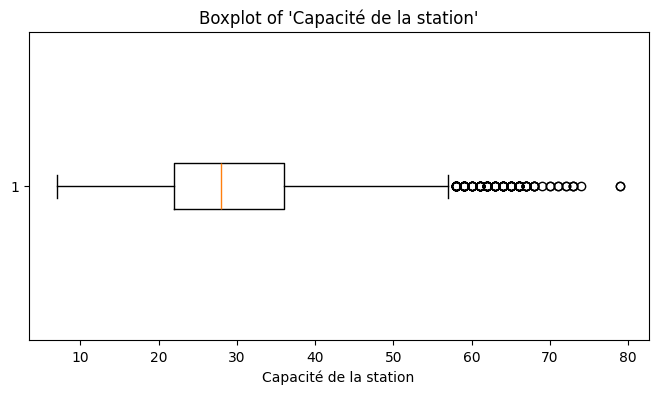

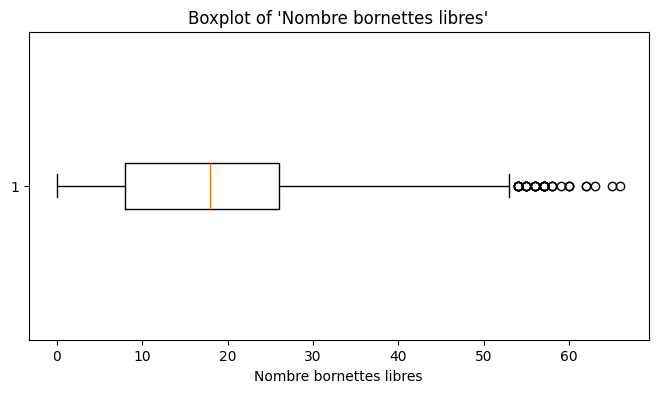

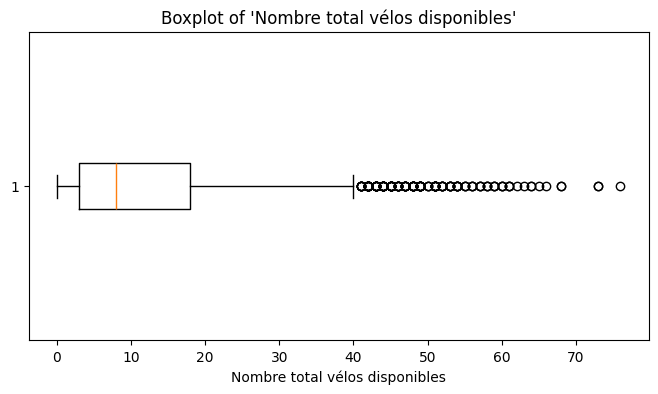

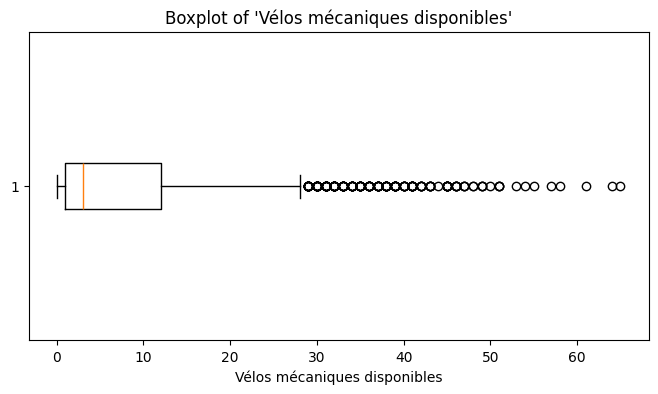

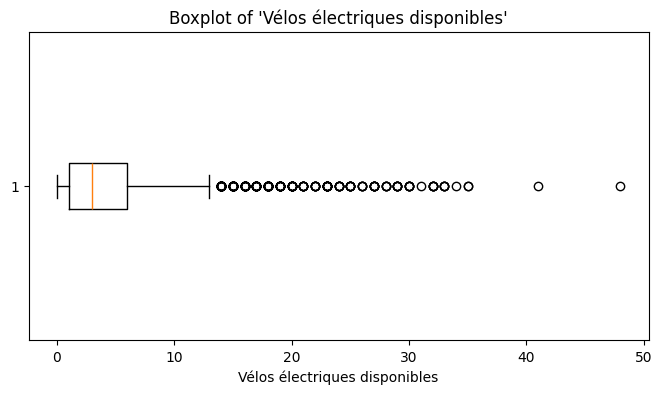

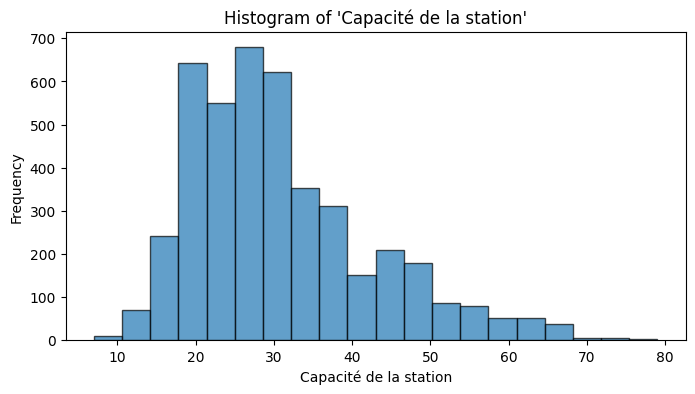

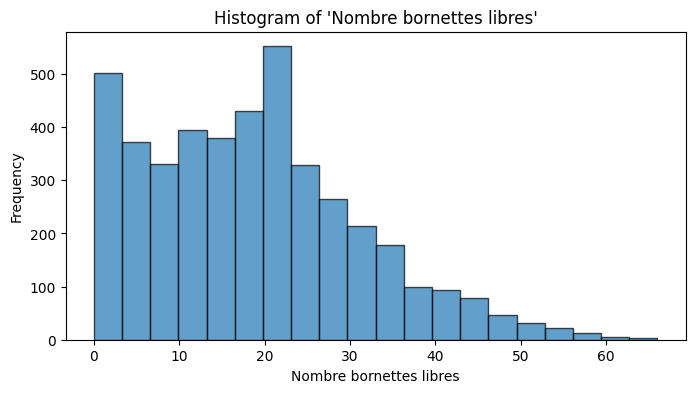

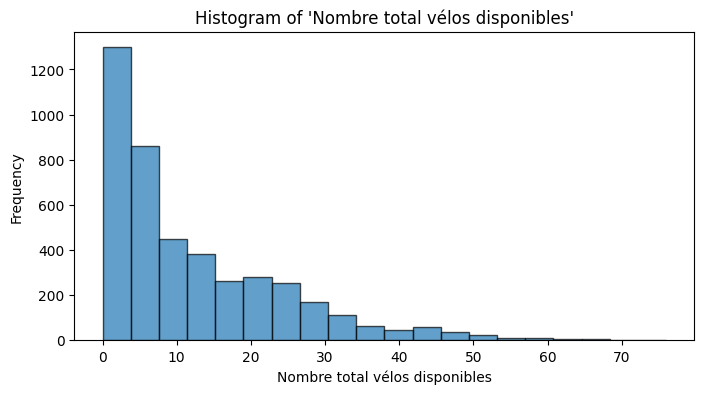

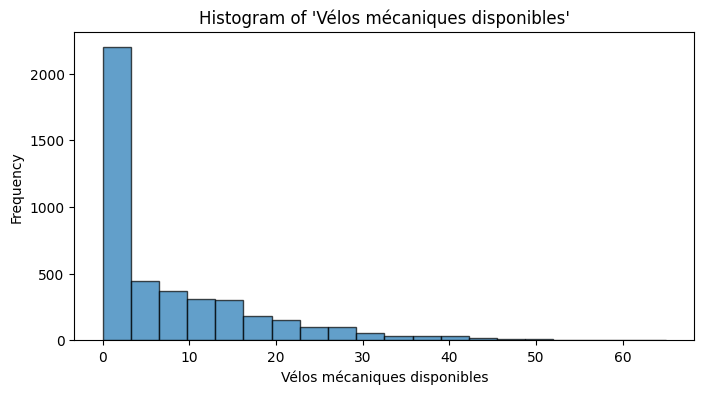

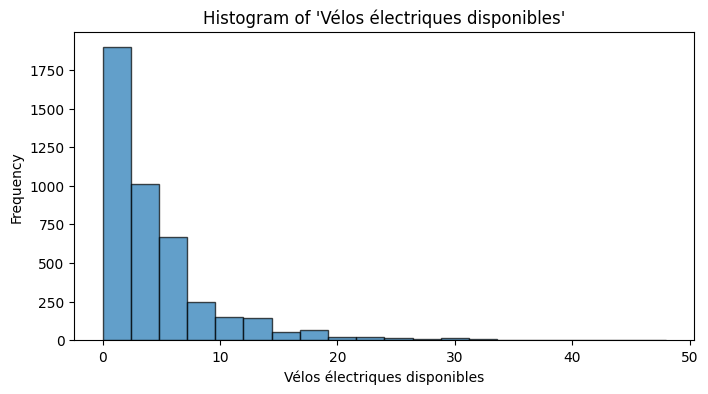

In [16]:
numerical_columns = ["Capacité de la station", "Nombre bornettes libres", 
                     "Nombre total vélos disponibles", "Vélos mécaniques disponibles", 
                     "Vélos électriques disponibles"]

# Générer les boxplots
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(f"Boxplot of '{col}'")
    plt.xlabel(col)
    plt.show()

# Générer les histogrammes
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    plt.hist(df[col].dropna(), bins=20, edgecolor="black", alpha=0.7)
    plt.title(f"Histogram of '{col}'")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

I Think that we finished the cleaning of our dataset. There are no NaN or incoherent values, the columns names are understandable and evely columns have the same amount of datas with no missing values

In [17]:
df1103_cleaned = df[df['Actualisation de la donnée'].dt.date == pd.to_datetime("2025-03-11").date()]
df1203_cleaned = df[df['Actualisation de la donnée'].dt.date == pd.to_datetime("2025-03-12").date()]
df1303_cleaned = df[df['Actualisation de la donnée'].dt.date == pd.to_datetime("2025-03-13").date()]
data_cleaned = [df1103_cleaned,df1203_cleaned,df1303_cleaned]
df1103_cleaned

Identifiant station                            Nom station  \
1471               16107          Benjamin Godard - Victor Hugo   
1472               40001                         Hôpital Mondor   
1473               44015             Rouget de L'isle - Watteau   
1474               14111            Cassini - Denfert-Rochereau   
1475                9020                     Toudouze - Clauzel   
...                  ...                                    ...   
2937               15056                           Place Balard   
2938                8002      Gare Saint-Lazare - Cour du Havre   
2939                4010                  Saint-Antoine Sévigné   
2940               42004  Westermeyer - Paul Vaillant-Couturier   
2941                9104                   Caumartin - Provence   

     Station en fonctionnement  Capacité de la station  \
1471                       OUI                      33   
1472                       OUI                      28   
1473                       OUI                      20   
1474                       OUI                      24   
1475                       OUI                      20   
...                        ...                     ...   
2937                       OUI                      28   
2938                       OUI                      44   
2939                       OUI                      36   
2940                       OUI                      32   
2941                       OUI                      23   

      Nombre bornettes libres  Nombre total vélos disponibles  \
1471                       26                               7   
1472                       11                              17   
1473                       10                              10   
1474                       18                               6   
1475                       18                               2   
...                       ...                             ...   
2937                        2                              26   
2938                        6                              38   
2939                        2                              34   
2940                        2                              30   
2941                        2                              21   

      Vélos mécaniques disponibles  Vélos électriques disponibles  \
1471                             3                              4   
1472                            10                              7   
1473                             1                              9   
1474                             0                              6   
1475                             0                              2   
...                            ...                            ...   
2937                            20                              6   
2938                            21                             17   
2939                            26                              8   
2940                            28                              2   
2941                            17                              4   

     Borne de paiement disponible Retour vélib possible  \
1471                          OUI                   OUI   
1472                          OUI                   OUI   
1473                          OUI                   OUI   
1474                          OUI                   OUI   
1475                          OUI                   OUI   
...                           ...                   ...   
2937                          OUI                   OUI   
2938                          OUI                   OUI   
2939                          OUI                   OUI   
2940                          OUI                   OUI   
2941                          OUI                   OUI   

     Actualisation de la donnée               Coordonnées géographiques  \
1471  2025-03-11 13:48:21+00:00                     48.865983, 2.275725   
1472  2025-03-11 13:55:18+00:00   

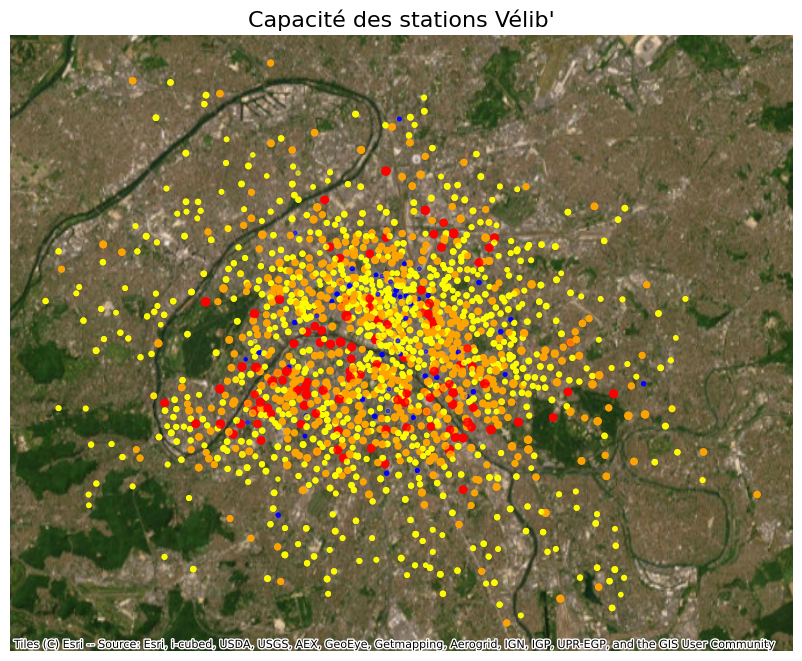

In [18]:
def plot_velib_capacity_map(df, title="Capacité des stations Vélib'"):
    # Extraction des coordonnées
    df[['latitude', 'longitude']] = df['Coordonnées géographiques'].str.split(', ', expand=True)
    df['latitude'] = df['latitude'].astype(float)
    df['longitude'] = df['longitude'].astype(float)

    # Définition des couleurs selon la capacité totale des stations
    df['color'] = df['Capacité de la station'].apply(lambda x: 'red' if x > 50 else 'orange' if x > 30 else 'yellow' if x > 15 else 'blue')

    # Création du GeoDataFrame
    df['geometry'] = df.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
    gdf = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:4326")

    # Création de la figure
    fig, ax = plt.subplots(figsize=(12, 8))

    # Affichage des stations Vélib' avec couleur et taille selon la capacité
    gdf.plot(ax=ax, marker='o', color=gdf['color'], markersize=gdf['Capacité de la station'] * 0.5, alpha=0.7)

    # Ajout du fond de carte (Esri World Imagery)
    ctx.add_basemap(ax, crs=gdf.crs, source=ctx.providers.Esri.WorldImagery)

    # Ajustements
    ax.set_title(title, fontsize=16)
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.set_axis_off()

    plt.show()

plot_velib_capacity_map(df)

In [19]:
def plot_velib_station_capacity(df, title="Densité des vélos disponibles par station"):
    # Extraction des coordonnées
    df[['latitude', 'longitude']] = df['Coordonnées géographiques'].str.split(', ', expand=True)
    df['latitude'] = df['latitude'].astype(float)
    df['longitude'] = df['longitude'].astype(float)

    # Calcul de la densité de vélos (évite division par 0 en ajoutant +1 à la capacité)
    df['densite_velos'] = df['Nombre total vélos disponibles'] / (df['Capacité de la station'] + 1)

    # Attribution des couleurs selon la densité de vélos
    df['color'] = df['densite_velos'].apply(lambda x: 'red' if x > 0.7 else 'orange' if x > 0.4 else 'yellow' if x > 0.1 else 'blue')

    # Création du GeoDataFrame
    df['geometry'] = df.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
    gdf = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:4326")

    # Création de la figure
    fig, ax = plt.subplots(figsize=(12, 8))

    # Affichage des stations Vélib' avec couleur selon densité
    gdf.plot(ax=ax, marker='*', color=gdf['color'], markersize=50, alpha=0.7, edgecolor="black")

    # Ajout du fond de carte (Esri World Street Map)
    ctx.add_basemap(ax, crs=gdf.crs, source=ctx.providers.Esri.WorldStreetMap)

    # Ajustements
    ax.set_title(title, fontsize=16)
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.set_axis_off()

    plt.show()


/var/folders/_v/hbm3rz4x403fj9qwqn8wddhr0000gn/T/ipykernel_68910/2722942047.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['latitude', 'longitude']] = df['Coordonnées géographiques'].str.split(', ', expand=True)
/var/folders/_v/hbm3rz4x403fj9qwqn8wddhr0000gn/T/ipykernel_68910/2722942047.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['latitude', 'longitude']] = df['Coordonnées géographiques'].str.split(', ', expand=True)
/var/folders/_v/hbm3rz4x403fj9qwqn8wddhr0000gn/T/ipykernel_68910/27229

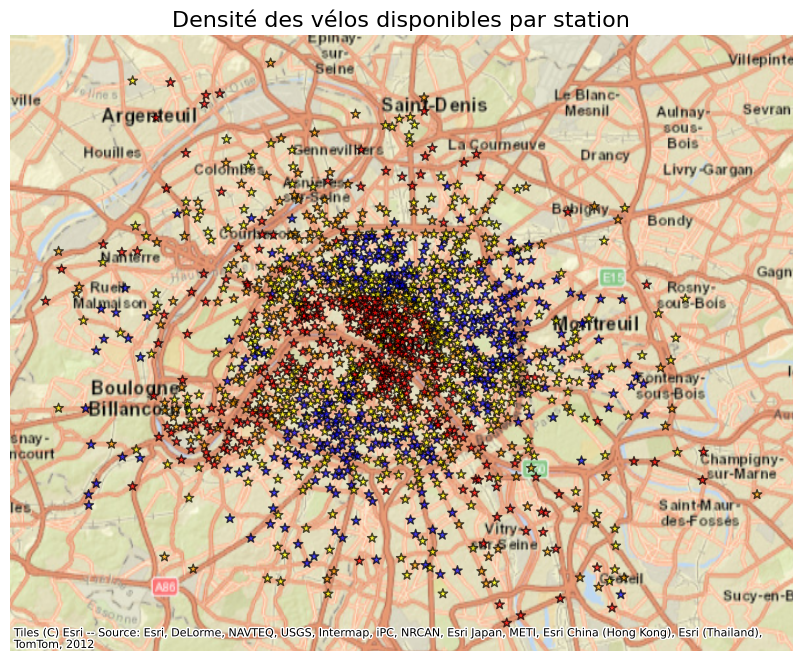

/var/folders/_v/hbm3rz4x403fj9qwqn8wddhr0000gn/T/ipykernel_68910/2722942047.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['latitude', 'longitude']] = df['Coordonnées géographiques'].str.split(', ', expand=True)
/var/folders/_v/hbm3rz4x403fj9qwqn8wddhr0000gn/T/ipykernel_68910/2722942047.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['latitude', 'longitude']] = df['Coordonnées géographiques'].str.split(', ', expand=True)
/var/folders/_v/hbm3rz4x403fj9qwqn8wddhr0000gn/T/ipykernel_68910/27229

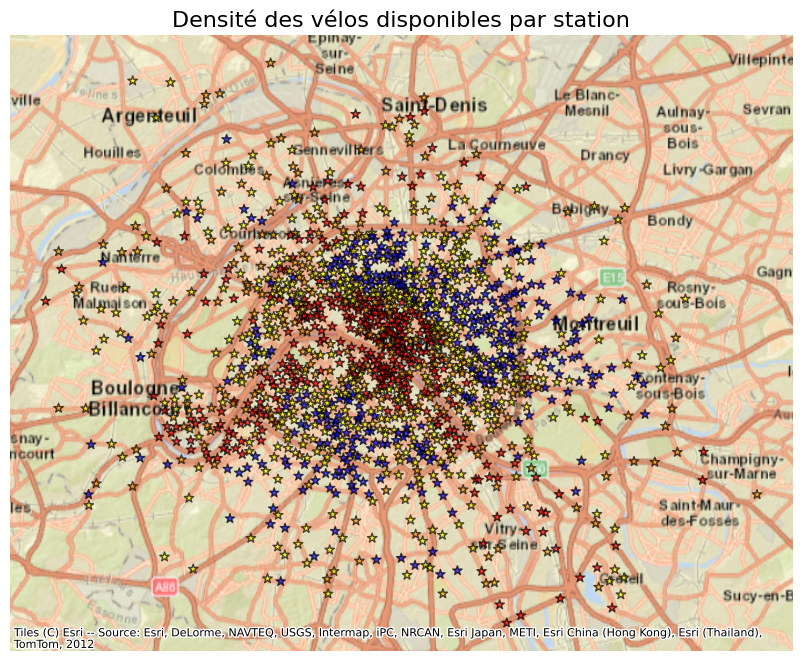

ValueError: Columns must be same length as key

In [20]:
for i in data_cleaned :
    plot_velib_station_capacity(i)